In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?


In [2]:
df=pd.read_csv('curriculum.csv')

In [3]:
df.shape

(866747, 10)

In [4]:
df.head()

,id,name,start_date,end_date,program_id,date,time,path,user_id,ip
0,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:55:03,/,1.0,97.105.19.61
1,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:02,java-ii,1.0,97.105.19.61
2,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:05,java-ii/object-oriented-programming,1.0,97.105.19.61
3,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:06,slides/object_oriented_programming,1.0,97.105.19.61
4,22.0,Teddy,2018-01-08,2018-05-17,2.0,2018-01-26,09:56:24,javascript-i/conditionals,2.0,97.105.19.61


In [5]:
df.rename(columns={'date': 'request_date', 'time': 'request_time'}, inplace=True)

In [6]:
df.head()

,id,name,start_date,end_date,program_id,request_date,request_time,path,user_id,ip
0,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:55:03,/,1.0,97.105.19.61
1,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:02,java-ii,1.0,97.105.19.61
2,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:05,java-ii/object-oriented-programming,1.0,97.105.19.61
3,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:06,slides/object_oriented_programming,1.0,97.105.19.61
4,22.0,Teddy,2018-01-08,2018-05-17,2.0,2018-01-26,09:56:24,javascript-i/conditionals,2.0,97.105.19.61


In [7]:
df['program_id'].value_counts()

2.0    687442
3.0     96172
1.0     30482
4.0         5
Name: program_id, dtype: int64

In [8]:
df[(df['name']=='Placeholder for students in transition')|(df['name']=='Staff')]['program_id'].value_counts()

2.0    79513
Name: program_id, dtype: int64

In [9]:
df[df['name']=='Io'].program_id.value_counts()

Series([], Name: program_id, dtype: int64)

In [10]:
df['name'].value_counts()

Staff         79513
Ceres         40711
Zion          37980
Fortuna       36892
Jupiter       36396
Voyageurs     35631
Ganymede      33436
Apex          33299
Deimos        32106
Darden        31507
Teddy         30840
Hyperion      29774
Betelgeuse    29217
Ulysses       28497
Europa        27991
Xanadu        27749
Bayes         26400
Wrangell      25573
Andromeda     25355
Kalypso       21965
Curie         21393
Yosemite      20729
Bash          17410
Luna          12677
Easley        11964
Marco         10191
Lassen         9561
Arches         8890
Sequoia        7444
Olympic        4926
Florence       4908
Kings          2836
Neptune        2501
Pinnacles      2119
Hampton        1712
Quincy         1234
Niagara         755
Mammoth         691
Glacier         598
Joshua          302
Ike             253
Badlands         93
Franklin         72
Apollo            5
Denali            4
Everglades        1
Name: name, dtype: int64

In [11]:
#program id 1

In [12]:
df[df['program_id']==1].start_date.max()

'2017-06-05'

In [13]:
df[df['program_id']==1].start_date.min()

'2014-02-04'

In [14]:
#program id 2

In [15]:
df[df['program_id']==2].start_date.max()

'2021-03-15'

In [16]:
df[df['program_id']==2].start_date.min()

'2014-02-04'

In [17]:
#Program id 3

In [18]:
df[df['program_id']==3].start_date.max()

'2021-03-15'

In [19]:
df[df['program_id']==3].start_date.min()

'2019-08-19'

In [20]:
#program id 4

In [21]:
df[df['program_id']==4].start_date.max()

'2015-03-30'

In [22]:
df[df['program_id']==4].start_date.min()

'2015-03-30'

**program id 4 looks like it was only used for one cohort**

In [23]:
#Ada was the first datascience cohort, id: 3

In [24]:
df[df['name']=='Ada'].start_date.min()

nan

In [25]:
df[df['program_id']==3]['name'].value_counts()

Darden      31507
Bayes       26400
Curie       21393
Easley      11964
Florence     4908
Name: name, dtype: int64

In [26]:
df.start_date.str.startswith('2019')

0         False
1         False
2         False
3         False
4         False
          ...  
866742    False
866743    False
866744    False
866745    False
866746      NaN
Name: start_date, Length: 866747, dtype: object

In [27]:
df['start_date'].isna().sum()

52646

In [28]:
df=df.dropna()

In [29]:
df.start_date.str.startswith('2019')

0         False
1         False
2         False
3         False
4         False
          ...  
866741    False
866742    False
866743    False
866744    False
866745    False
Name: start_date, Length: 814100, dtype: bool

## focus start_date

In [30]:
df.request_date = pd.to_datetime(df.request_date)
df = df.set_index(df.request_date)

In [31]:
df.head()

,id,name,start_date,end_date,program_id,request_date,request_time,path,user_id,ip
request_date,,,,,,,,,,
2018-01-26,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:55:03,/,1.0,97.105.19.61
2018-01-26,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:02,java-ii,1.0,97.105.19.61
2018-01-26,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:05,java-ii/object-oriented-programming,1.0,97.105.19.61
2018-01-26,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:06,slides/object_oriented_programming,1.0,97.105.19.61
2018-01-26,22.0,Teddy,2018-01-08,2018-05-17,2.0,2018-01-26,09:56:24,javascript-i/conditionals,2.0,97.105.19.61


In [32]:
df['path'].resample('Y').count()

request_date
2018-12-31    171509
2019-12-31    223242
2020-12-31    327419
2021-12-31     91930
Freq: A-DEC, Name: path, dtype: int64

In [33]:
df['year'] = df.request_date.dt.year

In [34]:
df.head()

,id,name,start_date,end_date,program_id,request_date,request_time,path,user_id,ip,year
request_date,,,,,,,,,,,
2018-01-26,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:55:03,/,1.0,97.105.19.61,2018
2018-01-26,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:02,java-ii,1.0,97.105.19.61,2018
2018-01-26,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:05,java-ii/object-oriented-programming,1.0,97.105.19.61,2018
2018-01-26,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:06,slides/object_oriented_programming,1.0,97.105.19.61,2018
2018-01-26,22.0,Teddy,2018-01-08,2018-05-17,2.0,2018-01-26,09:56:24,javascript-i/conditionals,2.0,97.105.19.61,2018


In [35]:
my_df=df[(df['year']==2018)|(df['year']==2019)|(df['year']==2020)]

In [36]:
my_df.shape

(722170, 11)

In [37]:
my_df.head()

,id,name,start_date,end_date,program_id,request_date,request_time,path,user_id,ip,year
request_date,,,,,,,,,,,
2018-01-26,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:55:03,/,1.0,97.105.19.61,2018
2018-01-26,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:02,java-ii,1.0,97.105.19.61,2018
2018-01-26,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:05,java-ii/object-oriented-programming,1.0,97.105.19.61,2018
2018-01-26,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:06,slides/object_oriented_programming,1.0,97.105.19.61,2018
2018-01-26,22.0,Teddy,2018-01-08,2018-05-17,2.0,2018-01-26,09:56:24,javascript-i/conditionals,2.0,97.105.19.61,2018


In [38]:
my_df.resample('M').count()

,id,name,start_date,end_date,program_id,request_date,request_time,path,user_id,ip,year
request_date,,,,,,,,,,,
2018-01-31,3092,3092,3092,3092,3092,3092,3092,3092,3092,3092,3092
2018-02-28,13001,13001,13001,13001,13001,13001,13001,13001,13001,13001,13001
2018-03-31,18991,18991,18991,18991,18991,18991,18991,18991,18991,18991,18991
2018-04-30,13687,13687,13687,13687,13687,13687,13687,13687,13687,13687,13687
2018-05-31,11279,11279,11279,11279,11279,11279,11279,11279,11279,11279,11279
2018-06-30,16870,16870,16870,16870,16870,16870,16870,16870,16870,16870,16870
2018-07-31,14651,14651,14651,14651,14651,14651,14651,14651,14651,14651,14651
2018-08-31,22245,22245,22245,22245,22245,22245,22245,22245,22245,22245,22245
2018-09-30,14943,14943,14943,14943,14943,14943,14943,14943,14943,14943,14943


In [39]:
hits=my_df['path'].resample('D').count()
hits

request_date
2018-01-26    533
2018-01-27    230
2018-01-28    168
2018-01-29    783
2018-01-30    614
             ... 
2020-12-27    240
2020-12-28    299
2020-12-29    533
2020-12-30    295
2020-12-31    245
Freq: D, Name: path, Length: 1071, dtype: int64

<AxesSubplot:xlabel='request_date'>

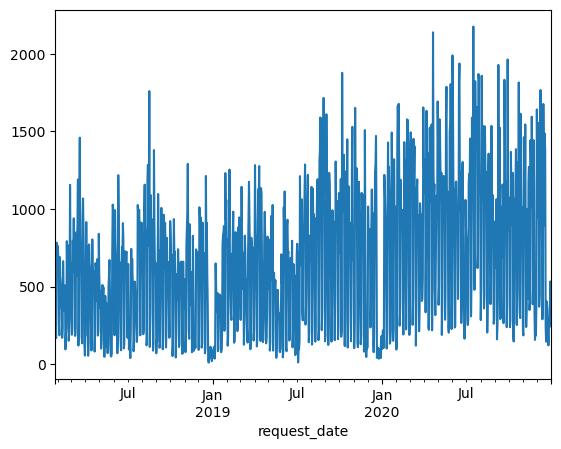

In [40]:
hits.plot()

In [41]:
my_df.program_id.value_counts()

2.0    613888
3.0     77987
1.0     30290
4.0         5
Name: program_id, dtype: int64

In [42]:
df.path.value_counts().head(110)

/                                           43845
javascript-i                                17380
search/search_index.json                    16869
toc                                         16775
java-iii                                    12726
                                            ...  
classification/overview                      2361
html-css/css-i                               2336
mysql/aliases                                2269
javascript-i/testing-user-functions          2219
1-fundamentals/modern-data-scientist.jpg     2147
Name: path, Length: 110, dtype: int64

In [43]:
dsdf=my_df[my_df['program_id']==3]

In [44]:
devdf=my_df[(my_df['program_id']==2)]

In [45]:
devdf.path.value_counts().head(70)

/                                              31092
toc                                            14521
javascript-i                                   14495
search/search_index.json                       13095
html-css                                       10705
                                               ...  
javascript-i/introduction/primitive-types       3536
jquery/essential-methods/attributes-and-css     3519
jquery/ajax/requests-and-responses              3483
mysql/relationships/joins                       3482
javascript-i/bom-and-dom/bom                    3460
Name: path, Length: 70, dtype: int64

In [46]:
dsdev=dsdf[dsdf['path'].str.contains('java')]

In [62]:
devds=devdf[devdf['path'].str.contains('pandas')]

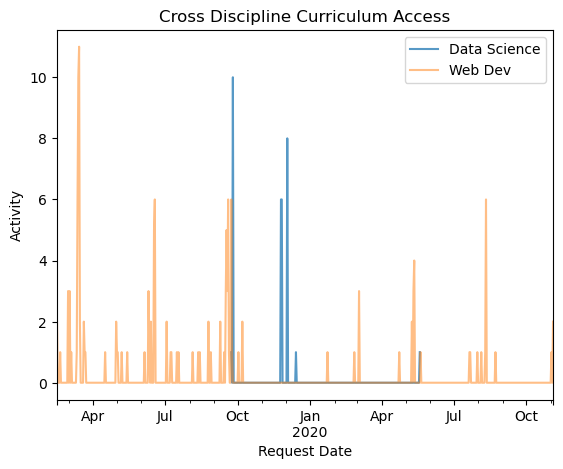

In [86]:
hits=dsdev['path'].resample('D').count()
hits.plot(alpha=.75, label='Data Science')
hits=devds['path'].resample('D').count()
hits.plot(alpha=.5, label='Web Dev')
plt.xlabel('Request Date')
plt.ylabel('Activity')
plt.title('Cross Discipline Curriculum Access')
plt.legend()

In [87]:
def q5():
    df=pd.read_csv('curriculum.csv')
    dsdf=my_df[my_df['program_id']==3]
    devdf=my_df[(my_df['program_id']==2)]
    dsdev=dsdf[dsdf['path'].str.contains('java')]
    devds=devdf[devdf['path'].str.contains('pandas')]
    hits=dsdev['path'].resample('D').count()
    hits.plot(alpha=.75, label='Data Science')
    hits=devds['path'].resample('D').count()
    hits.plot(alpha=.5, label='Web Dev')
    plt.xlabel('Request Date')
    plt.ylabel('Activity')
    plt.title('Cross Discipline Curriculum Access')
    plt.legend()

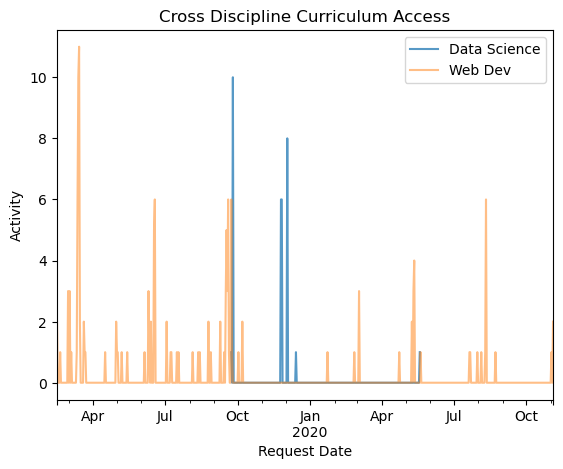

In [88]:
q5()

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 5:</h2>
    </header>
    <dl>
        <dt>At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?</dt>
        <dd>- The web dev students were accessing the data science curriculum when the first data science cohort started at Codeup.</dd>
        <dd>- In late 2019 it appears that access was cut off for both cohorts.</dd>
        <dd>- The cross-access in 2020 could be instructor accounts/instructors transitioning from web dev to data science or web dev access could have been cut off later in 2020.</dd>
    </dl>
</div>

<AxesSubplot:xlabel='request_date'>

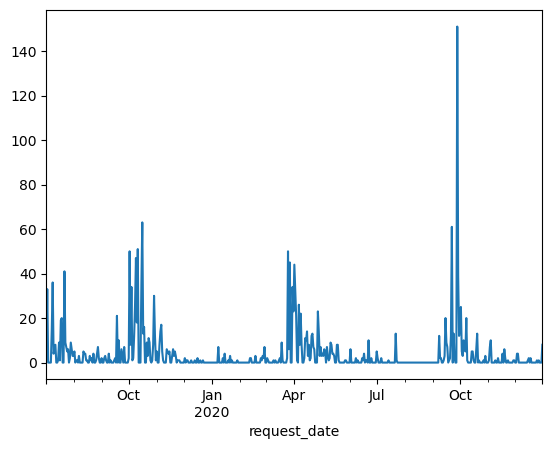

In [49]:
hits.plot()

# 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?


In [50]:
df.head()

,id,name,start_date,end_date,program_id,request_date,request_time,path,user_id,ip,year
request_date,,,,,,,,,,,
2018-01-26,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:55:03,/,1.0,97.105.19.61,2018
2018-01-26,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:02,java-ii,1.0,97.105.19.61,2018
2018-01-26,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:05,java-ii/object-oriented-programming,1.0,97.105.19.61,2018
2018-01-26,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:06,slides/object_oriented_programming,1.0,97.105.19.61,2018
2018-01-26,22.0,Teddy,2018-01-08,2018-05-17,2.0,2018-01-26,09:56:24,javascript-i/conditionals,2.0,97.105.19.61,2018


In [51]:
df['end_date']=pd.to_datetime(df['end_date'])

In [52]:
pd.DataFrame(df[['name','path']].groupby('name')['path'].value_counts())

path
name      path                           
Andromeda /                          1173
          toc                         638
          javascript-i                516
          spring                      487
          java-iii                    433
...                                   ...
Zion      uploads/598dc43df39e2.jpg     1
          web-design/intro              1
          web-design/ui/visuals         1
          web-design/ux/layout          1
          web-design/ux/purpose         1

[13312 rows x 1 columns]

In [66]:
ref=df[df['request_date']>df['end_date']]

In [82]:
pd.DataFrame(ref[['program_id','path']].groupby('program_id').nth([0,5]).agg('count'))

,0
path,7
